In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/data-export (1) (1).csv')

In [ ]:
df.shape

(3183, 10)

In [ ]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [ ]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)
df.columns=["channel group", "DateHour", "Users", "Sessions", "Engaged Session", "Average engagement time per session", "Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [ ]:
df["DateHour"]=pd.to_datetime(df["DateHour"],format="%Y%m%d%H",errors='coerce')

In [ ]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour

In [ ]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Session                      3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [ ]:
df.describe()

,DateHour,Users,Sessions,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


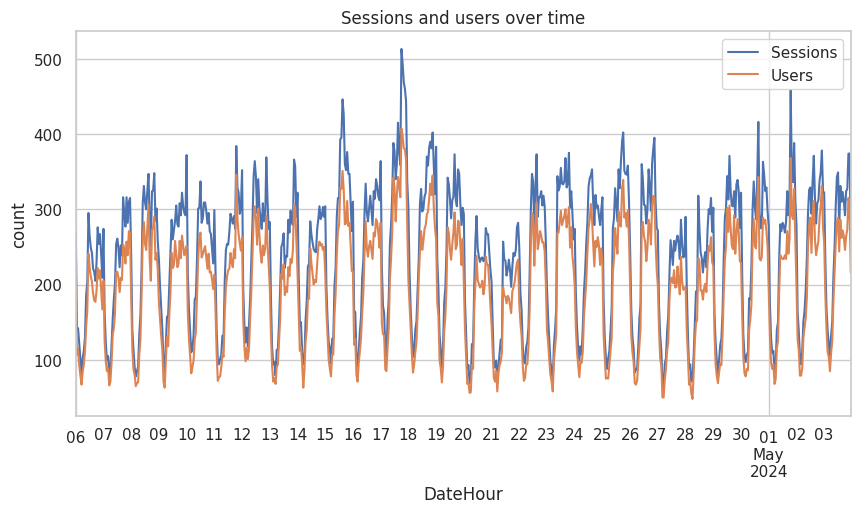

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

/tmp/ipython-input-306561786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


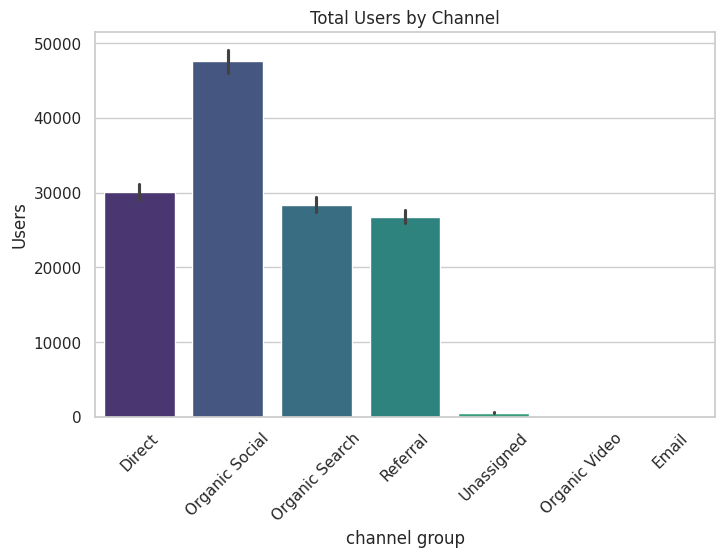

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="channel group",
    y="Users",
    estimator=np.sum,
    palette="viridis"
)
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

In [ ]:
channel_engagement = df.groupby("channel group")[
    "Average engagement time per session"
].mean().sort_values(ascending=False)

channel_engagement

,Average engagement time per session
channel group,
Organic Video,180.360000
Referral,92.660842
Unassigned,78.957923
Email,72.666667
Organic Social,53.493681
Organic Search,47.005018
Direct,45.533104


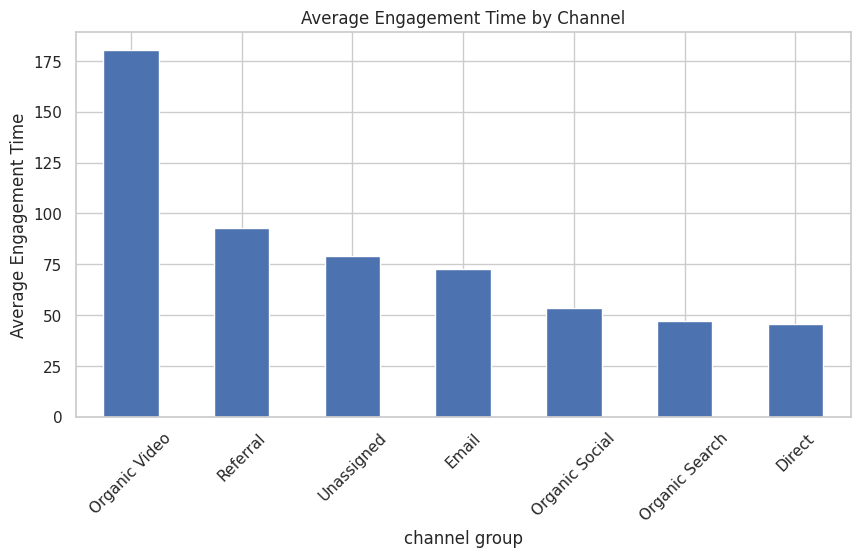

In [ ]:
plt.figure(figsize=(10,5))
channel_engagement.plot(kind="bar")
plt.title("Average Engagement Time by Channel")
plt.ylabel("Average Engagement Time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
engagement_by_channel = df.groupby("channel group")[
    "Engagement rate"
].mean().sort_values(ascending=False)

engagement_by_channel

,Engagement rate
channel group,
Organic Video,0.760000
Referral,0.660882
Organic Search,0.578906
Organic Social,0.541180
Direct,0.455723
Email,0.333333
Unassigned,0.007514


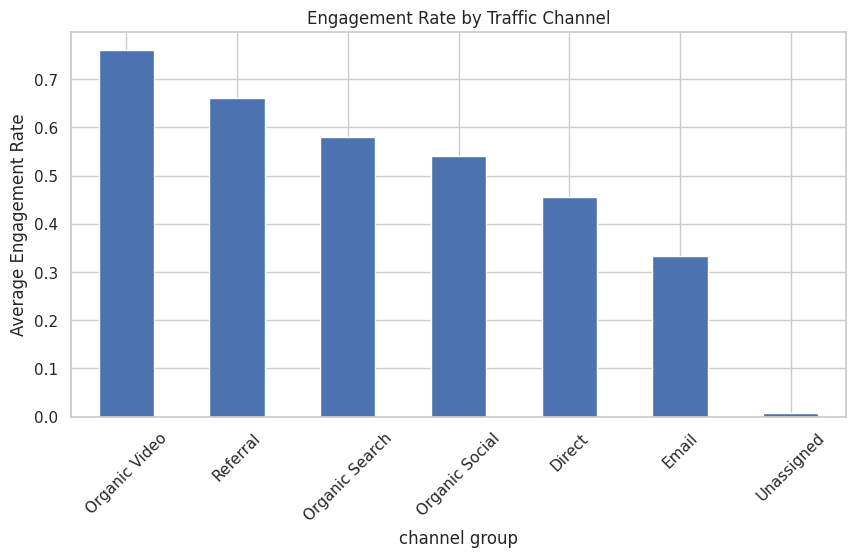

In [ ]:
plt.figure(figsize=(10,5))
engagement_by_channel.plot(kind="bar")
plt.title("Engagement Rate by Traffic Channel")
plt.ylabel("Average Engagement Rate")
plt.xticks(rotation=45)
plt.show()

In [ ]:
channel_sessions = df.groupby("channel group")[["Sessions", "Engaged Session"]].sum()
channel_sessions["Engagement_Percentage"] = (
    channel_sessions["Engaged Session"] / channel_sessions["Sessions"]
) * 100

channel_sessions.sort_values("Engagement_Percentage", ascending=False)

,Sessions,Engaged Session,Engagement_Percentage
channel group,,,
Organic Video,141,109,77.304965
Referral,30990,20653,66.644079
Organic Search,33372,19425,58.207479
Organic Social,60627,32697,53.931417
Direct,37203,17243,46.348413
Email,3,1,33.333333
Unassigned,559,4,0.715564


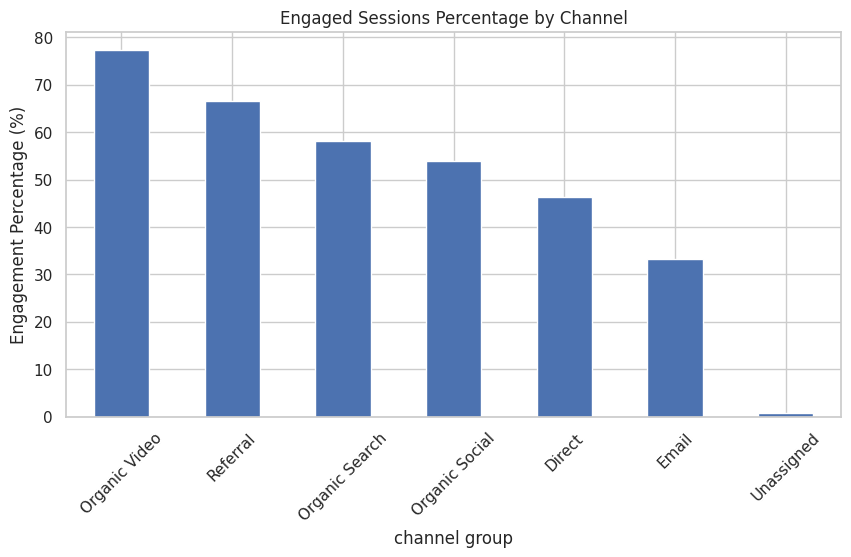

In [ ]:
channel_sessions["Engagement_Percentage"].sort_values(ascending=False).plot(
    kind="bar", figsize=(10,5)
)

plt.title("Engaged Sessions Percentage by Channel")
plt.ylabel("Engagement Percentage (%)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
hourly_traffic = df.groupby(["channel group", "Hour"])["Sessions"].sum().reset_index()
peak_hours = hourly_traffic.loc[
    hourly_traffic.groupby("channel group")["Sessions"].idxmax()
]

peak_hours.sort_values("channel group")

,channel group,Hour,Sessions
23,Direct,23,2581
24,Email,2,1
41,Organic Search,14,1964
51,Organic Social,0,3917
94,Organic Video,19,12
120,Referral,21,1799
138,Unassigned,15,38


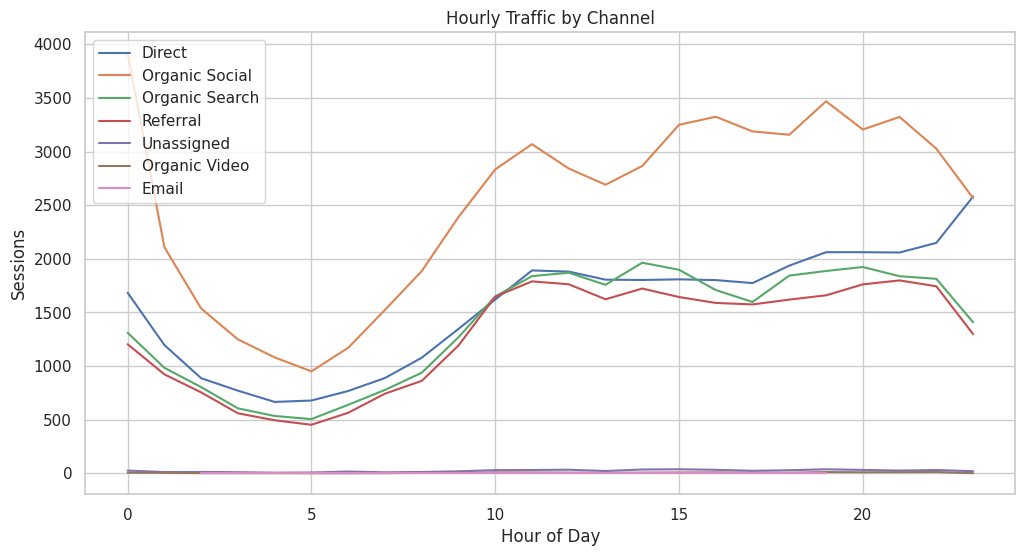

In [ ]:
plt.figure(figsize=(12,6))

for channel in df["channel group"].unique():
    data = hourly_traffic[hourly_traffic["channel group"] == channel]
    plt.plot(data["Hour"], data["Sessions"], label=channel)

plt.title("Hourly Traffic by Channel")
plt.xlabel("Hour of Day")
plt.ylabel("Sessions")
plt.legend()
plt.show()

In [ ]:
correlation = df["Sessions"].corr(df["Engagement rate"])
print("Correlation between Sessions and Engagement Rate:", correlation)

Correlation between Sessions and Engagement Rate: 0.30339357065106737


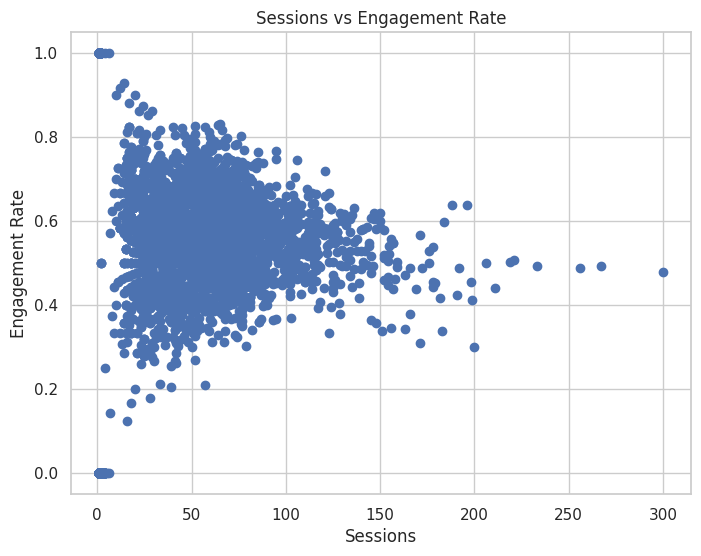

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["Sessions"], df["Engagement rate"])
plt.title("Sessions vs Engagement Rate")
plt.xlabel("Sessions")
plt.ylabel("Engagement Rate")
plt.grid(True)
plt.show()